In [3]:
pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 17.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


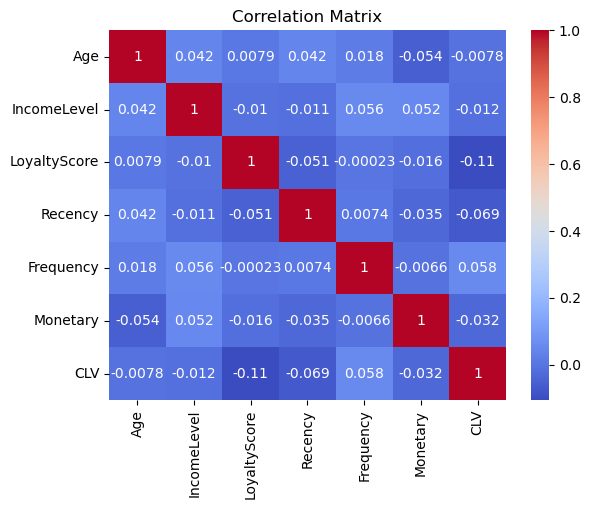

C:\Users\Arham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


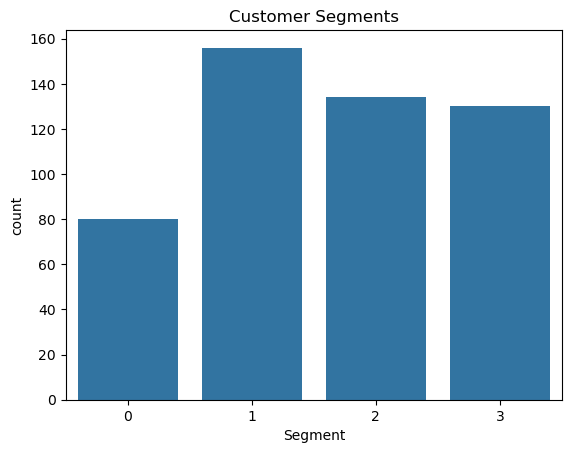

Confusion Matrix:
 [[81  0]
 [19  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        81
           1       0.00      0.00      0.00        19

    accuracy                           0.81       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.66      0.81      0.72       100


ROC AUC Score: 0.4684860298895387

Top 5 Association Rules:
    antecedents  consequents  support  confidence      lift
0  (Product_1)  (Product_4)     0.27    0.519231  1.128763
1  (Product_4)  (Product_1)     0.27    0.586957  1.128763
2  (Product_1)  (Product_5)     0.32    0.615385  1.183432
3  (Product_5)  (Product_1)     0.32    0.615385  1.183432
4  (Product_1)  (Product_8)     0.27    0.519231  1.038462


C:\Users\Arham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Arham\anaconda3\Lib\site-packag

In [1]:

# Comprehensive Customer & Sales Analysis Pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from mlxtend.frequent_patterns import apriori, association_rules

# --- Data Generation ---
np.random.seed(42)
num_customers = 500
df = pd.DataFrame({
    'CustomerID': range(1, num_customers + 1),
    'Age': np.random.randint(18, 70, size=num_customers),
    'IncomeLevel': np.random.normal(50000, 15000, size=num_customers),
    'LoyaltyScore': np.random.randint(1, 101, size=num_customers),
    'Recency': np.random.randint(1, 365, size=num_customers),
    'Frequency': np.random.randint(1, 50, size=num_customers),
    'Monetary': np.random.normal(300, 100, size=num_customers),
    'CLV': np.random.normal(1000, 300, size=num_customers)
})

# Introduce missing values
for col in ['IncomeLevel', 'LoyaltyScore']:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# --- Imputation ---
imputer = IterativeImputer()
df[df.columns.difference(['CustomerID'])] = imputer.fit_transform(df.drop(columns=['CustomerID']))

# --- Normalization ---
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['CustomerID']))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(columns=['CustomerID']).columns)

# --- Correlation ---
corr = df_scaled.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# --- Clustering ---
gmm = GaussianMixture(n_components=4, random_state=42)
df_scaled['Segment'] = gmm.fit_predict(df_scaled[['Recency', 'Frequency', 'Monetary']])
sns.countplot(x='Segment', data=df_scaled)
plt.title('Customer Segments')
plt.show()

# --- Churn Prediction ---
df_scaled['Churn'] = np.random.choice([0, 1], size=len(df_scaled), p=[0.8, 0.2])
X = df_scaled.drop(columns=['Segment', 'Churn'])
y = df_scaled['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rfc, {'n_estimators': [50, 100], 'max_depth': [5, 10]}, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1]))

# --- Market Basket Analysis ---
basket = pd.DataFrame(np.random.randint(0, 2, size=(100, 10)), columns=[f'Product_{i}' for i in range(1, 11)])
frequent_items = apriori(basket, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
print("\nTop 5 Association Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())
